In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
fashion_test_df = pd.read_csv('/Users/egreddy/Desktop/fashion-mnist_test.csv', sep = ',')

In [46]:
fashion_train_df = pd.read_csv('/Users/egreddy/Desktop/fashion-mnist_train.csv', sep = ',')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [47]:
fashion_train_df.shape

(60000, 785)

In [48]:
fashion_test_df.shape

(10000, 785)

In [49]:
training = np.array(fashion_train_df, dtype ='float32')

In [50]:
testing = np.array(fashion_test_df, dtype ='float32')

3.0

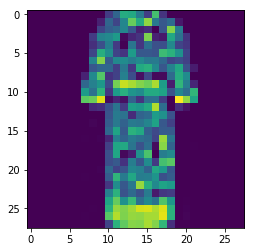

In [51]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, -1))
label = training[i, 0]
label

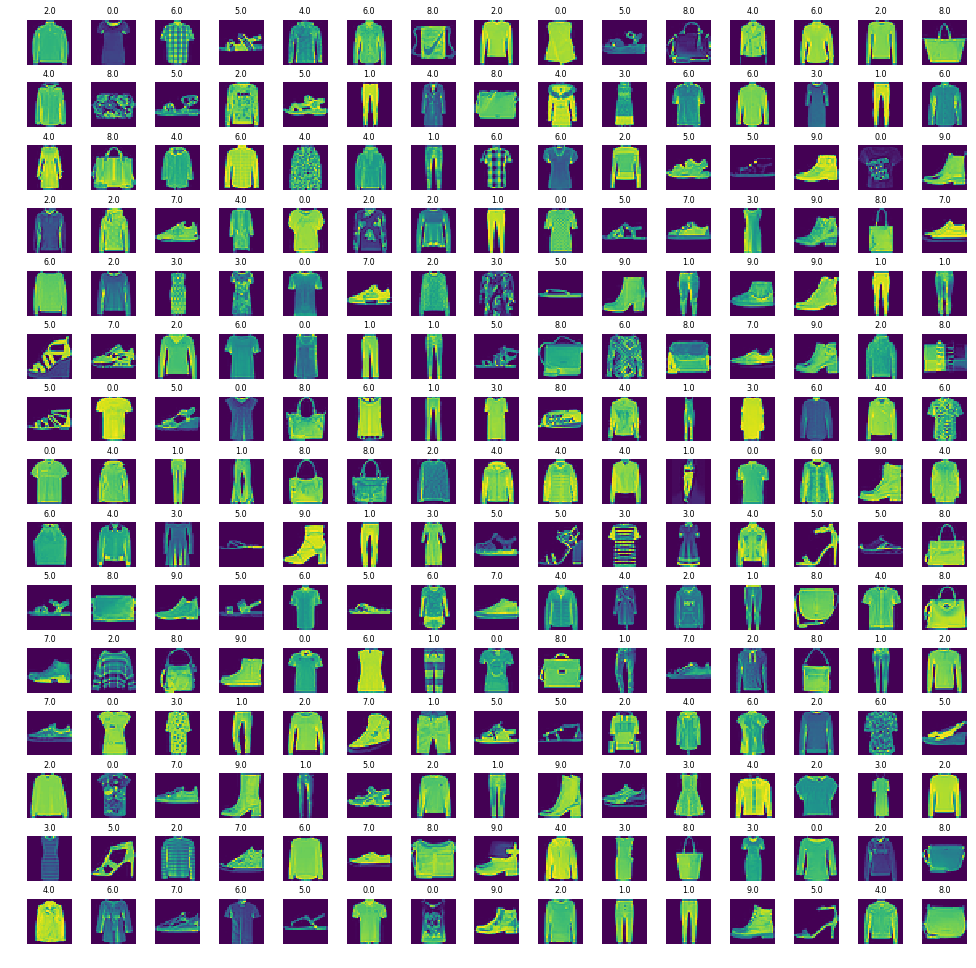

In [52]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid*L_grid):
    
    index = np.random.randint(0, n_training)
    
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
#convolutional neural networks

In [53]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [54]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_validate,y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [57]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [58]:
X_train.shape

(48000, 28, 28, 1)

In [59]:
X_test.shape

(10000, 28, 28, 1)

In [60]:
X_validate.shape

(12000, 28, 28, 1)

In [ ]:
#KERAS

In [61]:
import keras 

In [23]:
#conda install pip

In [24]:
#pip install tensorflow
#pip3 install --upgrade tensorflow # for python 3.*

In [25]:
#pip install Keras

In [4]:
#import keras

In [26]:
#import tensorflow

In [27]:
#pip install tensorflow

In [62]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [63]:
cnn_model = Sequential()

In [64]:
cnn_model.add(Conv2D(32,3,3, input_shape = (28,28,1), activation = 'relu'))

/Users/egreddy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [65]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [66]:
cnn_model.add(Flatten())

In [67]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/Users/egreddy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [68]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/Users/egreddy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [69]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [70]:
epochs = 50

In [71]:
cnn_model.fit(X_train, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, validation_data = (X_validate, y_validate))

/Users/egreddy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 17s 356us/step - loss: 0.9114 - accuracy: 0.7166 - val_loss: 0.5094 - val_accuracy: 0.8248
Epoch 2/50
48000/48000 [==============================] - 18s 370us/step - loss: 0.4607 - accuracy: 0.8377 - val_loss: 0.4230 - val_accuracy: 0.8566
Epoch 3/50
48000/48000 [==============================] - 19s 398us/step - loss: 0.4041 - accuracy: 0.8576 - val_loss: 0.3975 - val_accuracy: 0.8604
Epoch 4/50
48000/48000 [==============================] - 17s 362us/step - loss: 0.3738 - accuracy: 0.8685 - val_loss: 0.3588 - val_accuracy: 0.8770
Epoch 5/50
48000/48000 [==============================] - 17s 359us/step - loss: 0.3523 - accuracy: 0.8776 - val_loss: 0.3786 - val_accuracy: 0.8717
Epoch 6/50
48000/48000 [==============================] - 18s 365us/step - loss: 0.3382 - accuracy: 0.8822 - val_loss: 0.3430 - val_accuracy: 0.8804
Epoch 7/50
48000/48000 [==============================] 

In [72]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 163us/step
Test Accuracy : 0.915


In [73]:
predicted_classes = cnn_model.predict_classes(X_test)

In [74]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

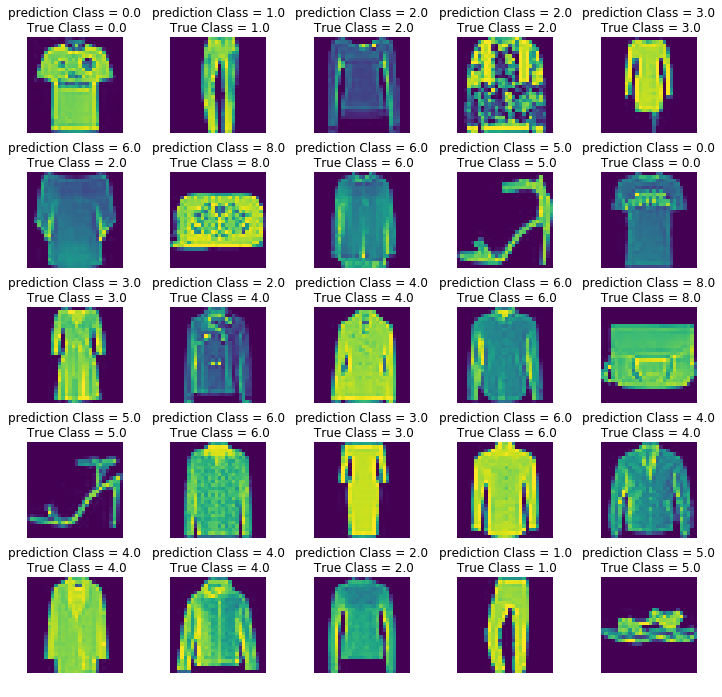

In [75]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, L*W):
    
    index = np.random.randint(0, n_training)
    
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title("prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)

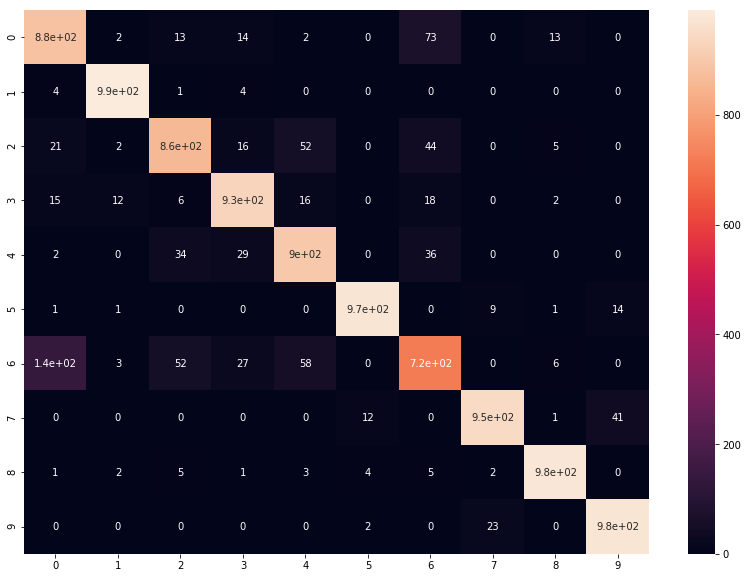

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [77]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.88      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.89      0.86      0.87      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.87      0.90      0.89      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.80      0.72      0.76      1000
     Class 7       0.97      0.95      0.96      1000
     Class 8       0.97      0.98      0.97      1000
     Class 9       0.95      0.97      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.92      0.91     10000

